<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Limpieza" data-toc-modified-id="Limpieza-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Limpieza</a></span><ul class="toc-item"><li><span><a href="#Nombres-y-tipos" data-toc-modified-id="Nombres-y-tipos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Nombres y tipos</a></span></li><li><span><a href="#Duplicados" data-toc-modified-id="Duplicados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Duplicados</a></span></li><li><span><a href="#Nulos" data-toc-modified-id="Nulos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Nulos</a></span></li><li><span><a href="#Atipicos" data-toc-modified-id="Atipicos-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Atipicos</a></span></li></ul></li><li><span><a href="#Transformaciones" data-toc-modified-id="Transformaciones-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Transformaciones</a></span><ul class="toc-item"><li><span><a href="#Por-factura" data-toc-modified-id="Por-factura-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Por factura</a></span></li></ul></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline</a></span><ul class="toc-item"><li><span><a href="#Evolucion-temporal" data-toc-modified-id="Evolucion-temporal-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Evolucion temporal</a></span></li><li><span><a href="#Durante-el-dia" data-toc-modified-id="Durante-el-dia-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Durante el dia</a></span></li><li><span><a href="#Por-pais" data-toc-modified-id="Por-pais-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Por pais</a></span></li></ul></li><li><span><a href="#Cliente" data-toc-modified-id="Cliente-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cliente</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Numero-de-compras-por-clientes" data-toc-modified-id="Numero-de-compras-por-clientes-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Numero de compras por clientes</a></span></li><li><span><a href="#Relaciones" data-toc-modified-id="Relaciones-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Relaciones</a></span></li></ul></li></ul></li><li><span><a href="#Analisis-de-Cohortes" data-toc-modified-id="Analisis-de-Cohortes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analisis de Cohortes</a></span></li><li><span><a href="#LTV" data-toc-modified-id="LTV-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LTV</a></span></li><li><span><a href="#segmentacion-RFM" data-toc-modified-id="segmentacion-RFM-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>segmentacion RFM</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from janitor import clean_names

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Automcompletar rápido
%config IPCompleter.greedy=True
sns.set_theme(style="whitegrid")

C:\Users\acrespod\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = 'C:/proyectos/04_SEGMENTACION_ECOMMERCE'
nombre_fichero_datos = 'ventas-por-factura.csv'
nombre_fichero_datos

'ventas-por-factura.csv'

In [3]:
ruta_completa = path + '/02_Datos/01_Originales/' + nombre_fichero_datos

datos = pd.read_csv(ruta_completa,index_col=0)
datos = datos.reset_index()

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


# Limpieza

## Nombres y tipos

In [5]:
df = clean_names(datos)
df.rename(columns = {'n°_de_factura':'id_factura'}, inplace=True)
df = df.astype({'fecha_de_factura':'datetime64'})

df.dtypes

id_factura                  object
fecha_de_factura    datetime64[ns]
id_cliente                 float64
pais                        object
cantidad                     int64
monto                       object
dtype: object

In [6]:
 df['monto']= df['monto'].apply(lambda x: x.replace(',','.')).astype('float64')

## Duplicados

In [7]:
df.duplicated().sum()

10

In [8]:
df.drop_duplicates(inplace = True)

## Nulos

In [9]:
df.isna().sum()

id_factura             0
fecha_de_factura       0
id_cliente          3722
pais                   0
cantidad               0
monto                  0
dtype: int64

In [10]:
# PAIS
df.loc[df.id_cliente.isna(),'id_cliente']=0

In [11]:
df.isna().sum()

id_factura          0
fecha_de_factura    0
id_cliente          0
pais                0
cantidad            0
monto               0
dtype: int64

## Atipicos

In [12]:
df.pais.value_counts()

United Kingdom          23534
Germany                   603
France                    462
EIRE                      361
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      29
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Singapore                  10
Malta                      10
Israel                      9
Iceland                     7
USA                         7
Canada                      6
Greece                      6
European Community          5
Czech Republic              5
Bahrain                     4
Lithuania                   4
United Ara

In [13]:
df['pais'] = np.where(df.pais == 'United Kingdom',df.pais,'Not United Kingdom')

In [14]:
df.pais.value_counts()

United Kingdom        23534
Not United Kingdom     2409
Name: pais, dtype: int64

# Transformaciones

In [15]:
def componentes_fecha(dataframe):
    date = dataframe.dt.date
    año = dataframe.dt.year
    mes = dataframe.dt.month
    dia = dataframe.dt.day
    hora = dataframe.dt.hour
    minuto = dataframe.dt.minute
    segundo = dataframe.dt.second
    
    
    return(pd.DataFrame({'date':date, 'año':año,'mes':mes, 'dia':dia, 'hora':hora, 'minuto':minuto, 'segundo':segundo}))

In [16]:
df = pd.concat([df,componentes_fecha(df.fecha_de_factura  )],axis=1 )

## Por factura
hay facturas que tienen dos eventos que temporalmente estan a un segundo. Los agrupamos para simplificar el dataseat

In [17]:
df_factura_doble = df.groupby('id_factura').filter(lambda x: len(x)>1).sort_values('id_factura')
df_factura_simple = df.groupby('id_factura').filter(lambda x: len(x)==1).sort_values('id_factura')

In [18]:
df_factura_doble.head(10)

,id_factura,fecha_de_factura,id_cliente,pais,cantidad,monto,date,año,mes,dia,hora,minuto,segundo
11688,536591,2020-12-01 16:58:00,14606.0,United Kingdom,12,39.06,2020-12-01,2020,12,1,16,58,0
8337,536591,2020-12-01 16:57:00,14606.0,United Kingdom,81,159.26,2020-12-01,2020,12,1,16,57,0
4890,540185,2021-01-05 13:40:00,14653.0,United Kingdom,237,212.15,2021-01-05,2021,1,5,13,40,0
4585,540185,2021-01-05 13:41:00,14653.0,United Kingdom,68,132.66,2021-01-05,2021,1,5,13,41,0
12918,541596,2021-01-19 16:19:00,17602.0,United Kingdom,644,581.13,2021-01-19,2021,1,19,16,19,0
10568,541596,2021-01-19 16:18:00,17602.0,United Kingdom,155,185.92,2021-01-19,2021,1,19,16,18,0
2915,541631,2021-01-20 10:47:00,12637.0,Not United Kingdom,211,581.55,2021-01-20,2021,1,20,10,47,0
8084,541631,2021-01-20 10:48:00,12637.0,Not United Kingdom,497,935.13,2021-01-20,2021,1,20,10,48,0
16198,541809,2021-01-21 14:59:00,0.0,United Kingdom,214,663.73,2021-01-21,2021,1,21,14,59,0
1377,541809,2021-01-21 14:58:00,0.0,United Kingdom,249,1343.71,2021-01-21,2021,1,21,14,58,0


In [19]:
df_doble_agrupado = df_factura_doble.groupby('id_factura').agg({'id_cliente':'max',\
                              'id_factura':'max',\
                              'pais':'max',\
                              'cantidad':'sum',\
                              'monto':'sum',\
                              'date':'max',\
                              'año':'max',\
                              'mes':'max',\
                              'dia':'max',\
                              'hora':'max',\
                              'minuto':'max',\
                              'segundo':'max'    
                             })
df_doble_agrupado.shape

(43, 12)

In [20]:
df_final = pd.concat([df_factura_simple,df_doble_agrupado],axis=0).reset_index()

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             25900 non-null  object        
 1   id_factura        25900 non-null  object        
 2   fecha_de_factura  25857 non-null  datetime64[ns]
 3   id_cliente        25900 non-null  float64       
 4   pais              25900 non-null  object        
 5   cantidad          25900 non-null  int64         
 6   monto             25900 non-null  float64       
 7   date              25900 non-null  object        
 8   año               25900 non-null  int64         
 9   mes               25900 non-null  int64         
 10  dia               25900 non-null  int64         
 11  hora              25900 non-null  int64         
 12  minuto            25900 non-null  int64         
 13  segundo           25900 non-null  int64         
dtypes: datetime64[ns](1), 

# Baseline
EL DATASET ESTA A NIVEL FACTURA

In [22]:
df_final[['cantidad','monto']].head()

,cantidad,monto
0,40,139.12
1,12,22.20
2,83,278.73
3,15,70.05
4,3,17.85


In [23]:
df_final[['cantidad','monto']].describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad,25900.0,199.862934,1108.563551,-80995.0,6.000,100.000,240.000,80995.0
monto,25900.0,376.360924,2013.261050,-168469.6,11.775,207.535,409.085,168469.6


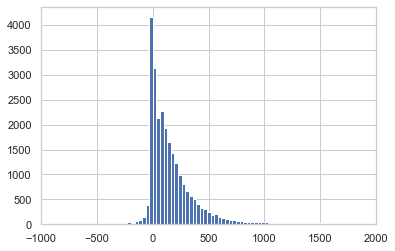

In [24]:
# CANTIDAD
df_final['cantidad'].hist(bins=5000)
plt.xlim([-1000,2000]);

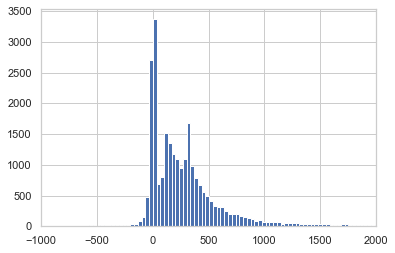

In [25]:
# MONTO
df_final['monto'].hist(bins=10000)
plt.xlim([-1000,2000]);

In [250]:
media = (df_final['monto']/df_final['cantidad']).median()
print(f"La media del ratio monto por cantidad es de {round(media,2)}")

La media del ratio monto por cantidad es de 1.93


- El numero de articulos medio por compra es 100
- El precio medio por compra es 207
- El precio medio por articulo es de 1.93

## Evolucion temporal

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             25900 non-null  object        
 1   id_factura        25900 non-null  object        
 2   fecha_de_factura  25857 non-null  datetime64[ns]
 3   id_cliente        25900 non-null  float64       
 4   pais              25900 non-null  object        
 5   cantidad          25900 non-null  int64         
 6   monto             25900 non-null  float64       
 7   date              25900 non-null  object        
 8   año               25900 non-null  int64         
 9   mes               25900 non-null  int64         
 10  dia               25900 non-null  int64         
 11  hora              25900 non-null  int64         
 12  minuto            25900 non-null  int64         
 13  segundo           25900 non-null  int64         
dtypes: datetime64[ns](1), 

<AxesSubplot:xlabel='año'>

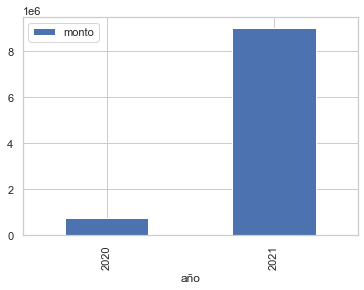

In [28]:
df_final.groupby('año').agg({'monto':'sum'}).plot.bar()

In [29]:
fecha_minima = str(min(df_final.date ))
fecha_maxima = str(max(df_final.date ))
print(f"La fecha minima es {fecha_minima}")
print(f"La fecha maxima es {fecha_maxima}")

La fecha minima es 2020-12-01
La fecha maxima es 2021-12-09


El dataset tiene un año de historico

In [30]:

def get_año_fecha(x):
    
    mes = str(x['mes'])
    if x['mes'] < 10:
        return str(x['año'])+'0'+mes 
    else:
        return str(x['año'])+mes
    
df_final['año_mes'] = df_final.apply(lambda x: get_año_fecha(x)  ,axis=1)

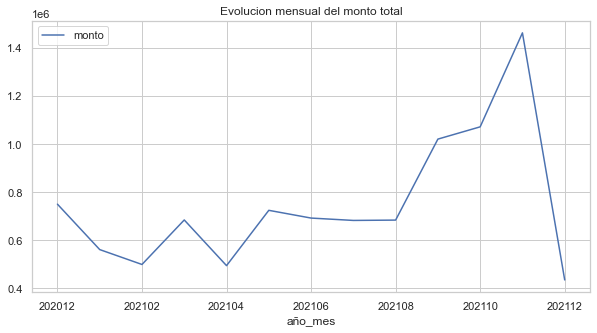

In [31]:
df_final.groupby('año_mes').agg({'monto':'sum'}).plot(figsize=(10,5),title='Evolucion mensual del monto total');

a partir de 202109 empieza a subir  el monto de cada factura muy fuerte

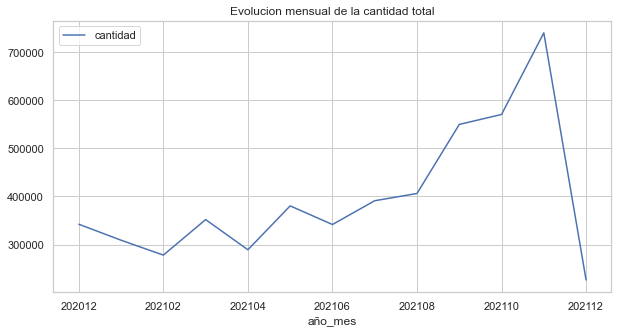

In [32]:
df_final.groupby('año_mes').agg({'cantidad':'sum'}).plot(figsize=(10,5),title='Evolucion mensual de la cantidad total');

La cantidad de articulos por mes aumenta mucho a partir de 202109

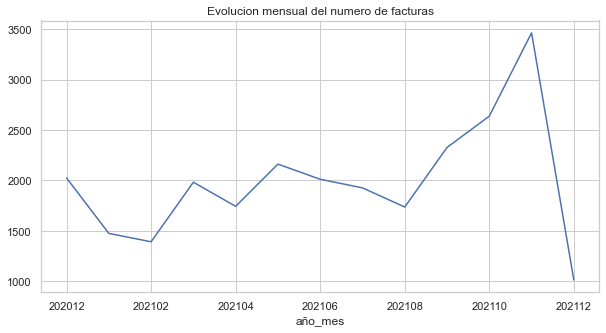

In [33]:
df_final.groupby('año_mes').size().plot(figsize=(10,5),title='Evolucion mensual del numero de facturas');

El numero de factura ha aumentado un monton a partir de 202109

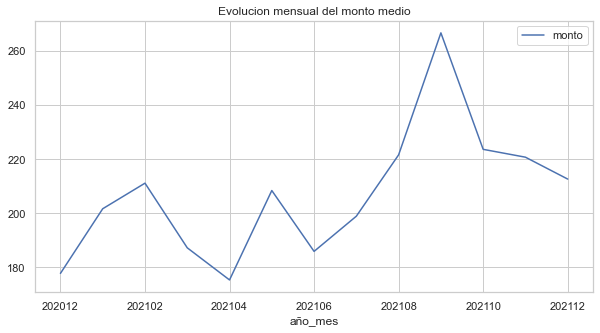

In [34]:
df_final.groupby('año_mes').agg({'monto':'median'}).plot(figsize=(10,5),title='Evolucion mensual del monto medio');

Cada factura de media ha aumentado desde mediados de 2021

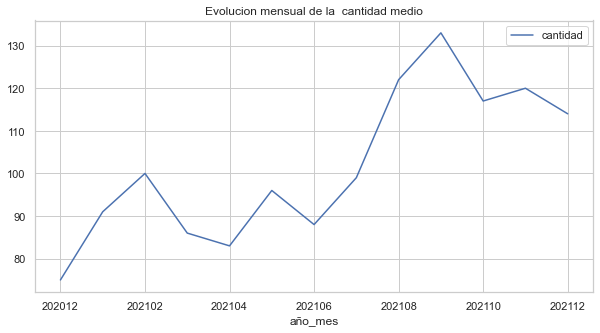

In [35]:
df_final.groupby('año_mes').agg({'cantidad':'median'}).plot(figsize=(10,5),title='Evolucion mensual de la  cantidad medio');

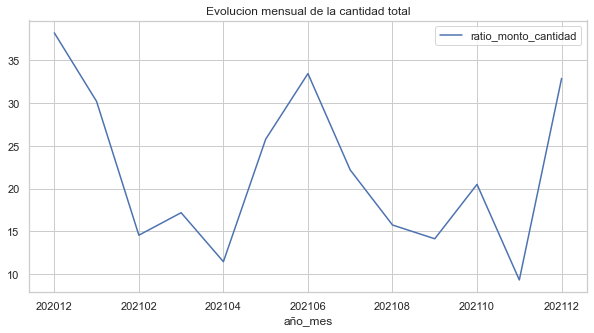

In [36]:
df_final['ratio_monto_cantidad'] = df_final['monto']/df_final['cantidad']
df_final.groupby('año_mes').agg({'ratio_monto_cantidad':'mean'}).plot(figsize=(10,5),title='Evolucion mensual de la cantidad total');

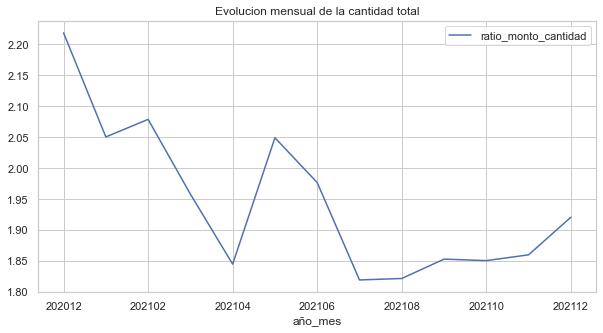

In [37]:
df_final.groupby('año_mes').agg({'ratio_monto_cantidad':'median'}).plot(figsize=(10,5),title='Evolucion mensual de la cantidad total');

**Conclusiones**:
- desde 202109 el monto y la cantidad total ha aumentado mucho
- La mayor partes es gracias a que se venden mas tickets, y en menor medida por el aumento del monto y cantidad media
- el precio medio por articulo ha disminuido mucho en los meses donde hay estas ventas

## Durante el dia

''

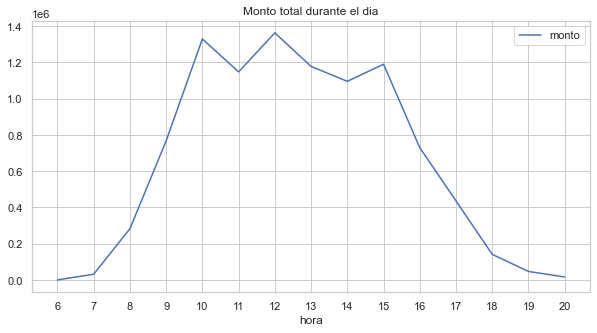

In [38]:
df_horas = df_final.groupby('hora').agg({'monto':'sum'})
df_horas.plot(figsize=(10,5),title='Monto total durante el dia')
plt.xticks(ticks = df_horas.index);
;

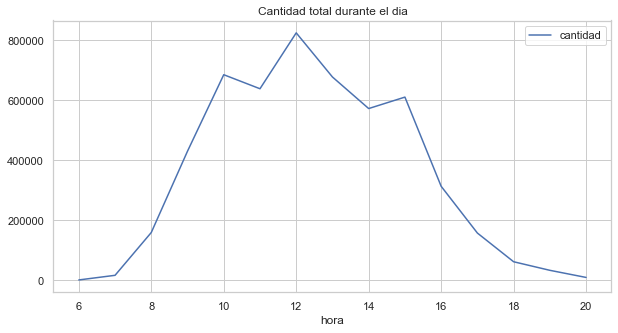

In [39]:
df_final.groupby('hora').agg({'cantidad':'sum'}).plot(figsize=(10,5),title='Cantidad total durante el dia');

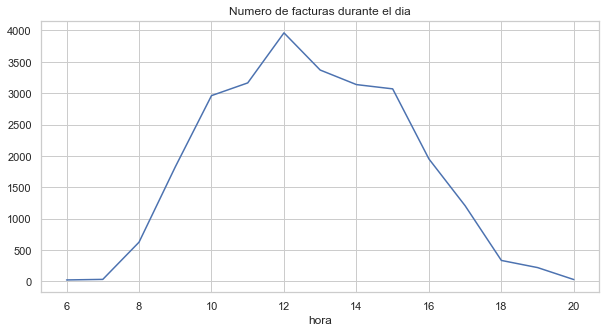

In [40]:
df_final.groupby('hora').size().plot(figsize=(10,5),title='Numero de facturas durante el dia');

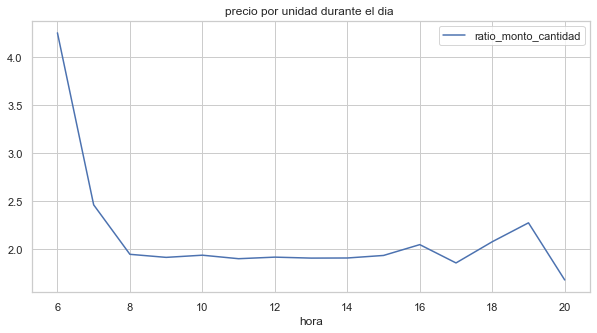

In [41]:
df_final.groupby('hora').agg({'ratio_monto_cantidad':'median'}).plot(figsize=(10,5),title='precio por unidad durante el dia ');

**Conclusion**:
- Entre las 10 y las 16h hay una zona donde hay muchos clientes
- el predio por articulo es siempre parecido

## Por pais

<AxesSubplot:xlabel='pais'>

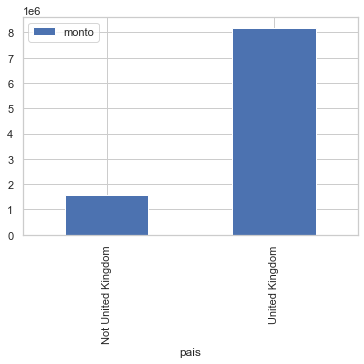

In [42]:
df_final.groupby(['pais']).agg({'monto':'sum'}).plot.bar()

<AxesSubplot:xlabel='pais'>

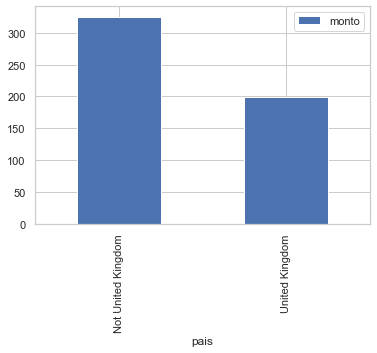

In [43]:
df_final.groupby(['pais']).agg({'monto':'median'}).plot.bar()

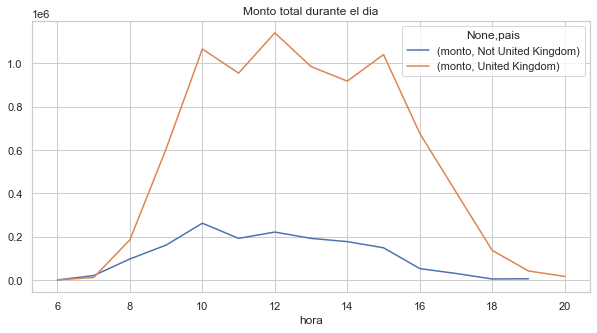

In [44]:
df_final.groupby(['hora','pais']).agg({'monto':'sum'}).unstack().plot(figsize=(10,5),title='Monto total durante el dia');

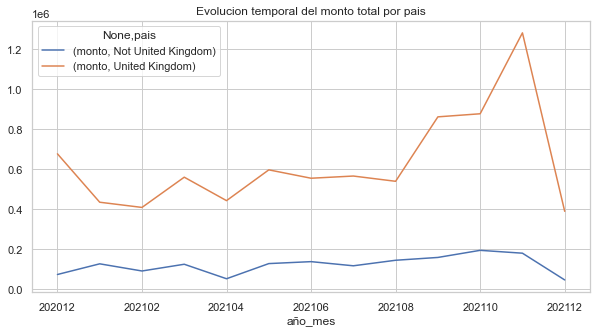

In [45]:
df_final.groupby(['año_mes','pais']).agg({'monto':'sum'}).unstack().plot(figsize=(10,5),title="Evolucion temporal del monto total por pais");

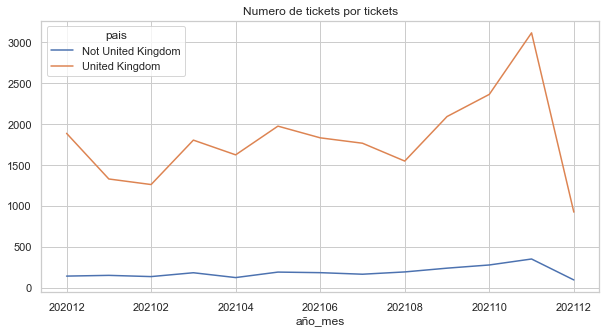

In [46]:
df_final.groupby(['año_mes','pais']).size().unstack().plot(figsize=(10,5),title='Numero de tickets por tickets');

**Conclusiones**:
- el aumento del numero de tickets proviene de reino unido
- Fuera de uk el pico de mayor ventas es de 10 a 15h

# Cliente

In [248]:
df_cliente = df_final.groupby('id_cliente').agg({'id_cliente':'count',\
                                    'cantidad':['sum','median'],\
                                    'monto':['sum','median']})

df_cliente.columns =['id_client_compras', 'cantidad_sum','cantidad_median','monto_sum','monto_median']

### Numero de compras por clientes

In [49]:
df_cliente.id_client_compras.describe().T

count    4373.000000
mean        5.922708
std        56.798813
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max      3710.000000
Name: id_client_compras, dtype: float64

(0.0, 100.0)

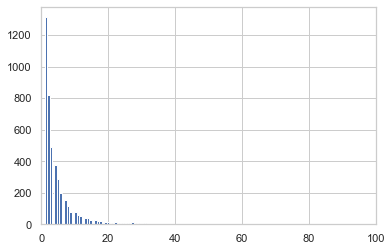

In [50]:
df_cliente.id_client_compras.hist(bins=5000)
plt.xlim([0,100])

La mayoria de clientes solo hacen 3 compras

### Relaciones

In [51]:
for v in ['id_client_compras','cantidad_sum','cantidad_median','monto_sum','monto_median']:
    df_cliente['log_'+v]=np.log(np.where(df_cliente[v]==0,1,df_cliente[v]  ) )

C:\Users\acrespod\AppData\Local\Temp/ipykernel_18164/1027173032.py:2: RuntimeWarning: invalid value encountered in log
  df_cliente['log_'+v]=np.log(np.where(df_cliente[v]==0,1,df_cliente[v]  ) )
C:\Users\acrespod\AppData\Local\Temp/ipykernel_18164/1027173032.py:2: RuntimeWarning: invalid value encountered in log
  df_cliente['log_'+v]=np.log(np.where(df_cliente[v]==0,1,df_cliente[v]  ) )
C:\Users\acrespod\AppData\Local\Temp/ipykernel_18164/1027173032.py:2: RuntimeWarning: invalid value encountered in log
  df_cliente['log_'+v]=np.log(np.where(df_cliente[v]==0,1,df_cliente[v]  ) )
C:\Users\acrespod\AppData\Local\Temp/ipykernel_18164/1027173032.py:2: RuntimeWarning: invalid value encountered in log
  df_cliente['log_'+v]=np.log(np.where(df_cliente[v]==0,1,df_cliente[v]  ) )


In [52]:
df_cliente.fillna(0,inplace=True)

<AxesSubplot:xlabel='log_monto_median', ylabel='log_cantidad_median'>

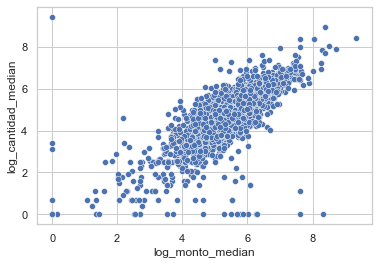

In [53]:
sns.scatterplot(data=df_cliente,x='log_monto_median', y='log_cantidad_median')

<AxesSubplot:xlabel='log_monto_sum', ylabel='log_cantidad_sum'>

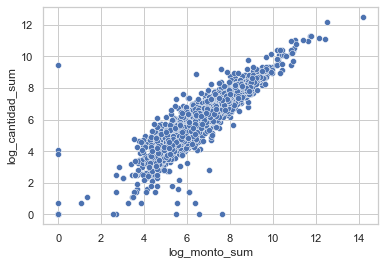

In [54]:
sns.scatterplot(data=df_cliente,x='log_monto_sum', y='log_cantidad_sum')

<AxesSubplot:xlabel='log_id_client_compras', ylabel='log_cantidad_sum'>

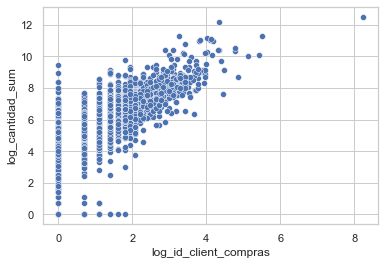

In [55]:
sns.scatterplot(data=df_cliente,x='log_id_client_compras', y='log_cantidad_sum')

<AxesSubplot:xlabel='log_id_client_compras', ylabel='log_cantidad_median'>

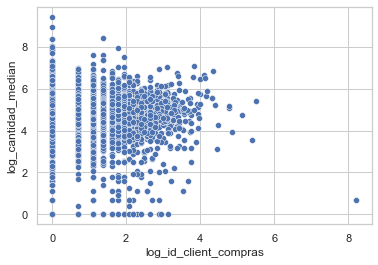

In [56]:
sns.scatterplot(data=df_cliente,x='log_id_client_compras', y='log_cantidad_median')

**Conclusiones**  
- El numero de compras medio es de 3 por cliente
- Hay una relacion entre la cantidad media y el monto medio. Parece que los clientes suelen comprar el mismo articulo muchas veces

In [57]:
df_cliente.nlargest(n = 10, columns = 'cantidad_sum')

,id_client_compras,cantidad_sum,cantidad_median,monto_sum,monto_median,log_id_client_compras,log_cantidad_sum,log_cantidad_median,log_monto_sum,log_monto_median
id_cliente,,,,,,,,,,
0.0,3710,269562,2.0,1447682.12,0.000,8.218787,12.504554,0.693147,14.185474,0.000000
14646.0,77,196719,960.0,279489.02,1306.280,4.343805,12.189532,6.866933,12.540718,7.174939
12415.0,26,77242,240.0,123725.45,637.560,3.258097,11.254699,5.480639,11.725820,6.457648
14911.0,248,77180,224.5,132572.62,427.700,5.513429,11.253896,5.413876,11.794886,6.058422
17450.0,55,69029,656.0,187482.17,1989.240,4.007333,11.142282,6.486161,12.141439,7.595508
18102.0,62,64122,678.0,256438.49,2622.000,4.127134,11.068543,6.519147,12.454644,7.871693
17511.0,46,63012,1215.5,88125.38,1732.915,3.828641,11.051080,7.102911,11.386516,7.457560
13694.0,60,61803,769.5,62653.10,893.800,4.094345,11.031707,6.645741,11.045368,6.795482
14298.0,45,58021,720.0,50862.44,741.900,3.806662,10.968560,6.579251,10.836880,6.609214


# Analisis de Cohortes

In [58]:
df_final.año_mes.nunique()

13

In [59]:
df_final.groupby(['id_cliente','año_mes']).count()

index  id_factura  fecha_de_factura  pais  cantidad  \
id_cliente año_mes                                                        
0.0        202012     317         317               317   317       317   
           202101     240         240               239   240       240   
           202102     191         191               188   191       191   
           202103     364         364               361   364       364   
           202104     360         360               358   360       360   
...                   ...         ...               ...   ...       ...   
18283.0    202110       1           1                 1     1         1   
           202111       4           4                 4     4         4   
           202112       1           1                 1     1         1   
18287.0    202105       1           1                 1     1         1   
           202110       2           2                 2     2         2   

                    monto  date  año  mes  dia  hora  minuto  segundo  \
id_cliente año_mes                                                      
0.0        202012     317   317  317  317  317   317     317      317   
           202101     240   240  240  240  240   240     240      240   
           202102     191   191  191  191  191   191     191      191   
           202103     364   364  364  364  364   364     364      364   
           202104     360   360  360  360  360   360     360      360   
...                   ...   ...  ...  ...  ...   ...     ...      ...   
18283.0    202110       1     1    1    1    1     1       1        1   
           202111       4     4    4    4    4     4       4        4   
           202112       1     1    1    1    1     1       1        1   
18287.0    202105       1     1    1    1    1     1       1        1   
           202110       2     2    2    2    2     2       2        2   

                    ratio_monto_cantidad  
id_cliente año_mes                        
0.0        202012                    317  
           202101                    240  
           202102                    191  
           202103                    364  
           202104                    360  
...                                  ...  
18283.0    202110                      1  
           202111                      4  
           202112                      1  
18287.0    202105                      1  
           202110                      2  

[13688 rows x 14 columns]

In [235]:
c = pd.crosstab(df_final.id_cliente,df_final.año_mes)
c = c.reset_index()
c.drop(columns=['id_cliente'],inplace=True)
c.columns = ["c_"+variables for variables in c.columns]
c

año_mes,id_cliente,202012,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
0,0.0,317,240,191,364,360,313,305,334,193,249,374,376,94
1,12346.0,0,2,0,0,0,0,0,0,0,0,0,0,0
2,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
3,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
4,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
4369,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
4370,18282.0,0,0,0,0,0,0,0,0,2,0,0,0,1
4371,18283.0,0,2,1,0,1,1,2,2,0,1,1,4,1


In [61]:
c_def = c.applymap(lambda x: 1 if x>0 else 0)
c_def

,c_202012,c_202101,c_202102,c_202103,c_202104,c_202105,c_202106,c_202107,c_202108,c_202109,c_202110,c_202111,c_202112
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,1,0,1,0,1,0,1
3,1,1,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,0,0,0,1,0,0,0,0,0,0,0,0,0
4369,0,0,0,0,0,0,1,0,0,0,0,0,0
4370,0,0,0,0,0,0,0,0,1,0,0,0,1
4371,0,1,1,0,1,1,1,1,0,1,1,1,1


In [62]:
variables_c = c_def.columns.tolist()


In [231]:
c.head(8)

,c_202012,c_202101,c_202102,c_202103,c_202104,c_202105,c_202106,c_202107,c_202108,c_202109,c_202110,c_202111,c_202112
0,317,240,191,364,360,313,305,334,193,249,374,376,94
1,0,2,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,1,0,1,0,1,0,1
3,1,1,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,1,7,0,0,0,0,0,2,0,1,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
# n=2
# variable = variables_c[n]
# condicion_compra = c_def.iloc[:,n]==1
# condicion_no_compra_columnas = c_def.iloc[:,n-2:n]==0

In [66]:
# condicion_compra

In [67]:
# condicion_no_compra.head()

In [68]:
def sum_booleana(x):
    resultado = True
    for valor in x:
        resultado = valor and resultado
    return resultado

# condicion_no_compra = condicion_no_compra_columnas.apply(lambda x: sum_booleana(x) ,axis=1)

In [69]:
# c_def.loc[ condicion_compra&condicion_no_compra,:]
# c_aux = c_def.loc[(condicion_compra) & (condicion_no_compra),variables_c[n:]].mean(axis=0)
# pd.DataFrame(c_aux,columns=[variable])

In [70]:
def get_elementos_cohorte(c_def,variables_c,n):
    
    variable = variables_c[n]
    condicion_compra = c_def.iloc[:,n]==1
    
    condicion_no_compra_columnas = c_def.iloc[:,n-2:n]==0
    condicion_no_compra = condicion_no_compra_columnas.apply(lambda x: sum_booleana(x) ,axis=1)
    
    return (condicion_compra & condicion_no_compra)

def get_cohorte(c_def,variables_c,cohorte_index,n):
    variable = variables_c[n]
    c_aux = c_def.loc[cohorte_index,variables_c[n:]].mean(axis=0)
    return pd.DataFrame(c_aux,columns=[variable])

In [71]:
lista_cohorte=[]
for n in range(2,10):
    cohorte_index = get_elementos_cohorte(c_def,variables_c,n)
    aux_cohorte = get_cohorte(c_def,variables_c,cohorte_index,n)
    lista_cohorte.append(aux_cohorte)
matrix_cohorte = pd.concat(lista_cohorte,axis=1)

In [72]:
matrix_cohorte

,c_202102,c_202103,c_202104,c_202105,c_202106,c_202107,c_202108,c_202109
c_202102,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c_202103,0.247368,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
c_202104,0.192105,0.205660,1.000000,NaN,NaN,NaN,NaN,NaN
c_202105,0.278947,0.271698,0.247113,1.000000,NaN,NaN,NaN,NaN
c_202106,0.268421,0.241509,0.260970,0.244493,1.000000,NaN,NaN,NaN
c_202107,0.247368,0.232075,0.242494,0.215859,0.233708,1.000000,NaN,NaN
c_202108,0.255263,0.196226,0.240185,0.237885,0.233708,0.238693,1.000000,NaN
c_202109,0.281579,0.284906,0.258661,0.270925,0.321348,0.248744,0.277473,1.000000
c_202110,0.257895,0.247170,0.277136,0.268722,0.296629,0.301508,0.277473,0.297256
c_202111,0.313158,0.311321,0.321016,0.330396,0.379775,0.321608,0.340659,0.393293


Solo un 25% de los nuevos clientes siguen comprando.

# LTV

In [247]:
def LTV_a_meses(c_def,df_final,variables_c,n,meses_calculo,v_mes):

    cohorte = variables_c[n]
    mes_fin = n+meses_calculo+1

    cohorte_id_clientes_series = get_elementos_cohorte(c_def,variables_c,n=n);


    meses_seleccionados = df_final.año_mes.isin(v_mes[n:mes_fin])

    df_LTV0 = df_final.loc[ meses_seleccionados,: ].groupby('id_cliente')\
                                     .agg({'monto':'sum'})\
                                     .reset_index()

    df_LTV0 = df_LTV0.astype({'id_cliente':'int'})
    df_LTV1 =df_LTV0.loc[cohorte_id_clientes_series]
    LTV_KPI = df_LTV1.monto.median()
    return LTV_KPI


meses_calculo = 4
v_mes = df_final.año_mes.unique().tolist()


for n in range(2,9):
    cohorte = variables_c[n]
    LTV_KPI = LTV_a_meses(c_def,df_final,variables_c,n,meses_calculo,v_mes)
    print(f"KPI LTV de la cohorte {cohorte} a {meses_calculo} meses: {round(LTV_KPI,2)}")

KPI LTV de la cohorte c_202102 a 4 meses: 542.76
KPI LTV de la cohorte c_202103 a 4 meses: 428.85
KPI LTV de la cohorte c_202104 a 4 meses: 401.82
KPI LTV de la cohorte c_202105 a 4 meses: 544.52
KPI LTV de la cohorte c_202106 a 4 meses: 463.8
KPI LTV de la cohorte c_202107 a 4 meses: 489.27
KPI LTV de la cohorte c_202108 a 4 meses: 605.8


Como minimo el LTV tiene un valor de 400. Este seria nuestro CPA para adquirir clientes

# segmentacion RFM

In [302]:
df_final.dropna(inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25857 entries, 0 to 25856
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 25857 non-null  object        
 1   id_factura            25857 non-null  object        
 2   fecha_de_factura      25857 non-null  datetime64[ns]
 3   id_cliente            25857 non-null  float64       
 4   pais                  25857 non-null  object        
 5   cantidad              25857 non-null  int64         
 6   monto                 25857 non-null  float64       
 7   date                  25857 non-null  object        
 8   año                   25857 non-null  int64         
 9   mes                   25857 non-null  int64         
 10  dia                   25857 non-null  int64         
 11  hora                  25857 non-null  int64         
 12  minuto                25857 non-null  int64         
 13  segundo         

In [294]:
df_final['date']=df_final.fecha_de_factura.dt.date

In [301]:
df_final.isna().sum()

index                    0
id_factura               0
fecha_de_factura        43
id_cliente               0
pais                     0
cantidad                 0
monto                    0
date                    43
año                      0
mes                      0
dia                      0
hora                     0
minuto                   0
segundo                  0
año_mes                  0
ratio_monto_cantidad     0
dtype: int64

In [300]:
(df_final['date']-min(df_final['date']) ).

C:\Users\acrespod\AppData\Local\Temp/ipykernel_18164/2495624384.py:1: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  (df_final['date']-min(df_final['date']) ).isna().sum()


43

In [358]:
cortes = [0, 0.2, 0.4,0.6, 0.8, 1]

df_RFM = df_final.groupby(['id_cliente']).agg({'date':'max',\
                                      'monto':'sum',\
                                      'id_factura':'count',\
                                       'cantidad':'sum'       
                                              })

df_RFM.drop(index=[0],inplace=True)
df_RFM['F'] = pd.qcut(df_RFM['id_factura'],cortes,duplicates='drop',labels=False)+1
df_RFM['M'] = df_RFM.monto.transform(lambda x: pd.qcut(x,cortes,duplicates='drop',labels=False)+1)

df_RFM['R_days'] =  df_RFM.date.transform(lambda x: x-min(x)).dt.days
df_RFM['R'] = pd.qcut(df_RFM['R_days'],cortes,duplicates='drop',labels=False)+1

In [364]:
df_RFM.rename(columns={'id_factura':'numero_compras','cantidad':'numero_prod_total'},inplace=True)
df_RFM['RFM'] = df_RFM.apply(lambda x: str(x.R) + str(x.F) + str(x.M), axis = 1)

In [365]:
metricas = ['monto', 'numero_compras', 'numero_prod_total']
dimensiones = ['R','F','M','RFM']

minicubo = df_RFM[dimensiones + metricas]
minicubo = minicubo.melt(id_vars = metricas)
minicubo = minicubo.groupby(['variable','value'], as_index = False)[metricas].median()
minicubo.head()

,variable,value,monto,numero_compras,numero_prod_total
0,F,1,306.55,1.0,170.0
1,F,2,682.91,3.0,379.0
2,F,3,1236.28,5.0,738.0
3,F,4,3429.97,12.0,1973.0
4,M,1,145.86,1.0,76.0


C:\Users\acrespod\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


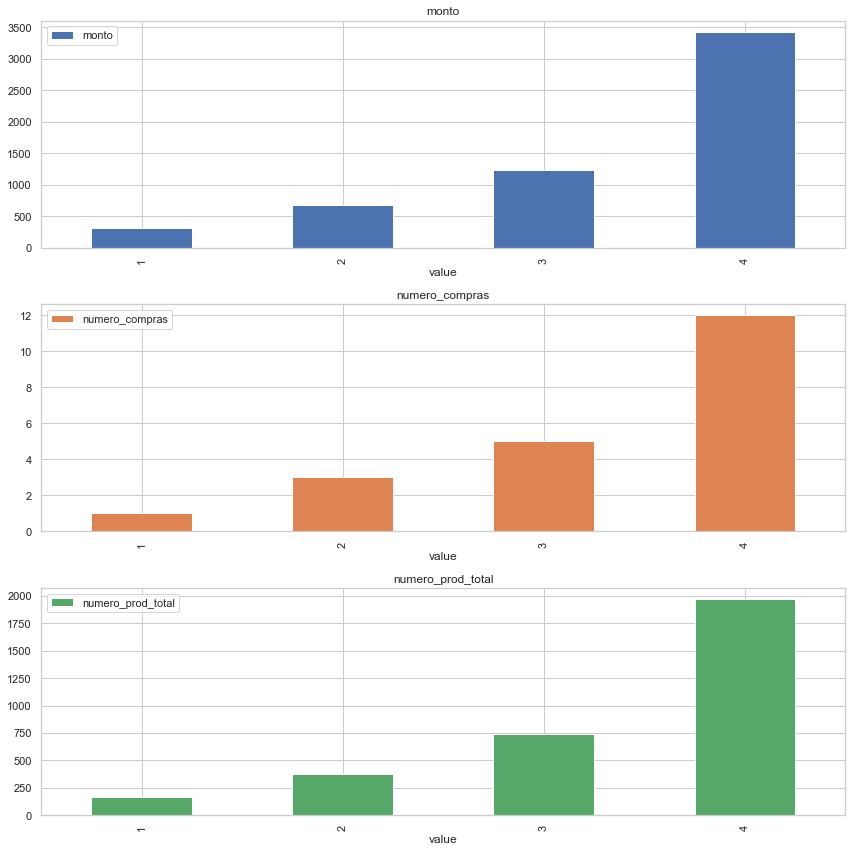

In [366]:
minicubo[minicubo.variable == 'F'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

hay que invertir en programas de fidelizacion para que la frecuencia de los clientes aumente.  
Solo los clientes con una frecuencia alta se dejan mas dinero

C:\Users\acrespod\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


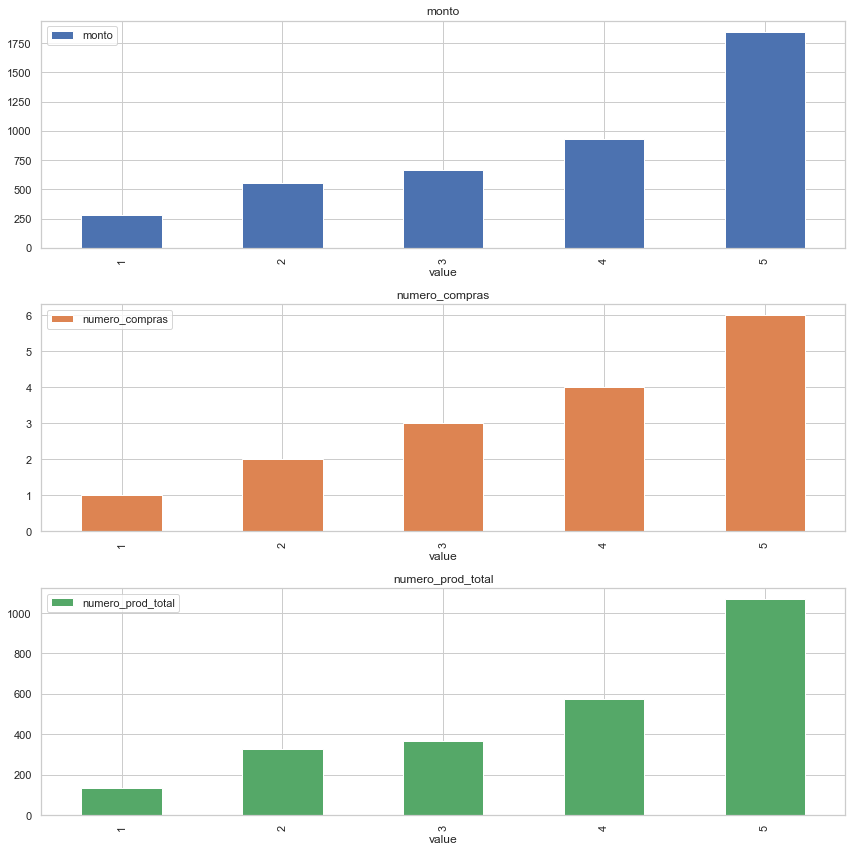

In [367]:
minicubo[minicubo.variable == 'R'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

C:\Users\acrespod\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


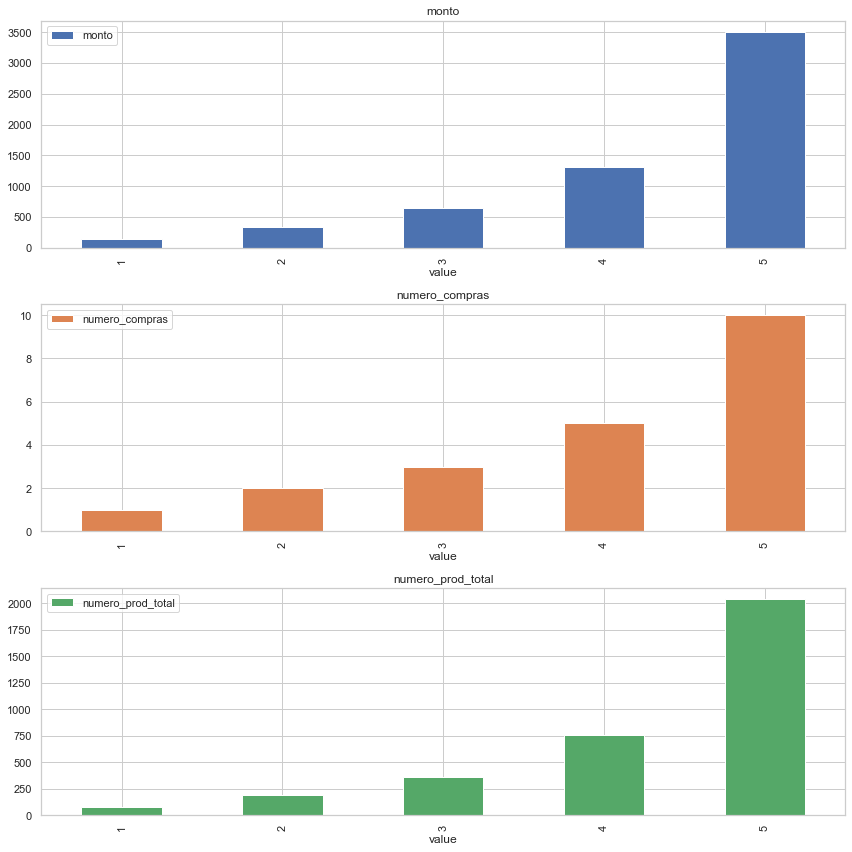

In [368]:
minicubo[minicubo.variable == 'M'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

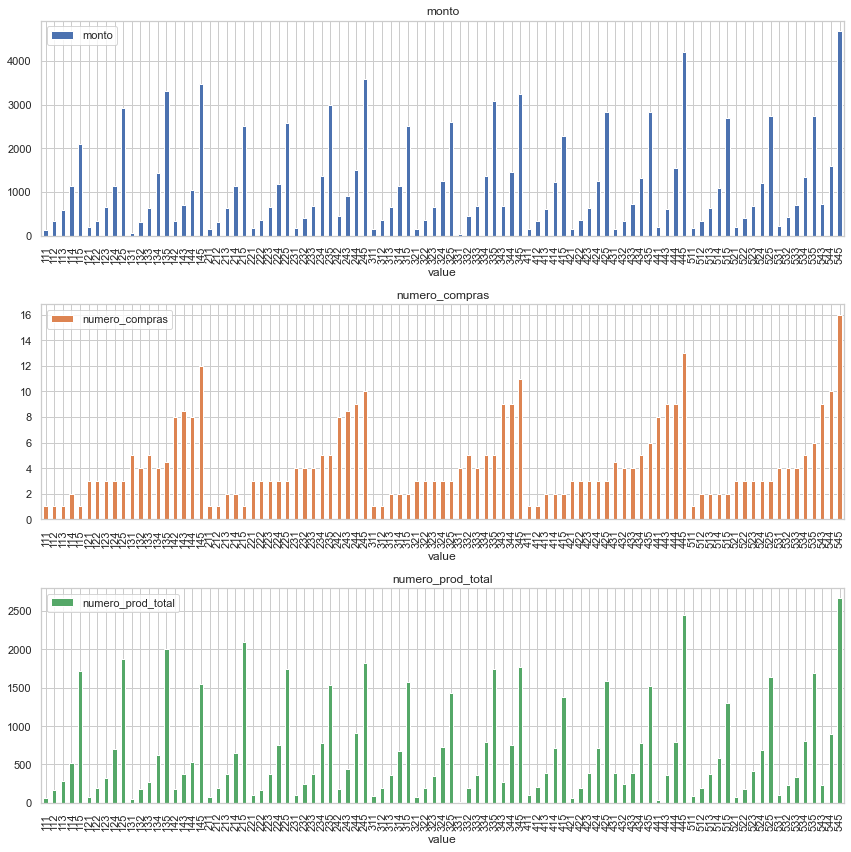

In [369]:
minicubo[minicubo.variable == 'RFM'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [370]:
df_RFM.RFM.value_counts()

111    365
545    321
112    243
211    162
212    155
      ... 
143      2
431      2
543      2
242      1
441      1
Name: RFM, Length: 93, dtype: int64

- Hay clientes que gastan mucho aunque no visiten mucho la tienda. Hacen compras de un valor destacado. Seria conveniente hacer un plan para que tuvieran una frecuencia de compra mayor.
- Hay clientes que compran mucho porque compran muchas veces. Seria conveniente hacer una newsletter para estos clientes.

# Conclusiones

- El numero de articulos medio por compra es 100
- El precio medio por compra es 207
- El precio medio por articulo es de 1.93
- Solo un 25% de los nuevos clientes sigue comprando. Habria que implementar un programa de fidelizacion.
- Tenemos un LTV a 4 meses de como minimo 400 euros. Este sería la cantidad máxima que se podria invertir para conseguir un cliente.
- Hemos segmentado clientes importantes en un analisis RFM